# Content

In this notebook, we will build the predictors features to classify products in prime or not prime.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/interim/amazon_shop_data_boxing_fighting_gloves_interim.csv')

# 1. Price bool

During the exploratory analysis, we saw that the price conditioned the number of prime products. We will simplify the feature into boolean. We will assume a price band between twenty and infinite pounds and another price band between zero and 19.99 pounds.

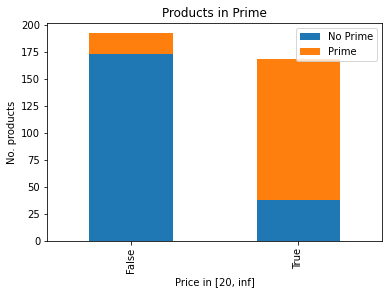

In [4]:
prime_by_price = pd.crosstab((data['price'] >=20),
                    data['prime_option'])

prime_by_price.plot(kind='bar',stacked=True)
plt.legend(['No Prime', 'Prime'], loc='upper right')
plt.title('Products in Prime')
plt.ylabel('No. products')
plt.xlabel('Price in [20, inf]')
plt.savefig('figures/price_bool.png')
plt.show()

data['price_bool'] = (data['price'] >=20)

# 2. Position in category rank standarized

We are going to standarize the position in cat due to the high range of values.

In [42]:
print('category position range: ', '[', min(data['position_c']),',', max(data['position_c']),']')

category position range:  [ 396.0 , 943348.0 ]


We will standarize the feature:
$$Y = \frac{X - \mu_x}{\sigma_x}$$
If we use this transformation, the optimization algorithms will perform better in a soft space than in a large and empty one.

In [43]:
data['position_cat_stand'] = (data['position_c'] - np.mean(data['position_c']))/np.std(data['position_c'])

# 3. Product rating to integer

Initially, the rating is between zero and five with one decimal (ex: 4.2, 3.8, etc.). We will transform the feature into an integer such that: $X \longrightarrow 10X$. This transformation allows better interpretability in terms of unitary increments than the float version.

In [44]:
data['rating_mult'] = data['rating']*10

# Export the training dataset to csv

Finally we just export the training dataset to implement the model.

In [47]:
training_data = data[['price_bool', 'rating_mult',
                      'sponsored_option', 'position_cat_stand',
                      'prime_option', 'subcategory']]
training_data.to_csv('../data/processed/training_data.csv', index=False)